# 1. Data Preparation

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set display max columns to None
pd.set_option('display.max_columns', None)

In [ ]:
# Read dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check for Data Type

In [ ]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Mengubah kolom TotalCharges menjadi numerical (Code data preprocessing ini diambil dari Assignment Guidance)
# Exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

# Transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# 2. Data Cleansing

## Check for Missing Values

In [ ]:
# Memeriksa jumlah data hilang
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Memeriksa persentase data hilang
df.isna().sum() * 100 / len(df)

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


Tidak ditemukan data hilang (missing values)

## Check for Duplicated Data

In [ ]:
df.duplicated().sum()

0

Tidak ditemukan data duplikat (duplicated data)

# 3. Exploratory Data Analysis (EDA)

## Statistical Summary

In [ ]:
# Mengubah kolom SeniorCitizen menjadi kategorikal
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [ ]:
# Melihat list kolom untuk membuat grouping data
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Grouping data untuk mempermudah analisis
categoricals = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# Categoricals statistical summary
df[categoricals].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


1. Kolom customerID:
- Memiliki 7032 unique values. Artinya, setiap pelanggan memiliki ID yang unik.
2. Kolom gender:
- Memiliki 2 unique values: 'Male' and 'Female'
- Mayoritas pelanggan berjenis kelamin Pria (3549 pelanggan) dan sisanya berjenis kelamin Wanita.
3. Kolom SeniorCitizen:
- Memiliki 2 unique values: 'Yes' and 'No' (setelah diubah menjadi kategorikal)
- Mayoritas pelanggan berusia muda (5890 pelanggan) dan sisanya berusia senior.
4. Kolom Partner:
- Memiliki 2 unique values: 'Yes' and 'No'
- Mayoritas pelanggan tidak memiliki pasangan (3639 pelanggan) dan sisanya memiliki pasangan.
5. Kolom Dependents:
- Memiliki 2 unique values: 'Yes' and 'No'
- Mayoritas pelanggan tidak memiliki tanggungan (4933 pelanggan) dan sisanya memiliki tanggungan.
6. Kolom PhoneService:
- Memiliki 2 unique values: 'Yes' and 'No'
- Mayoritas pelanggan memiliki layanan telepon (6352 pelanggan) dan sisanya tidak memiliki layanan telepon.
7. Kolom MultipleLines:
- Memiliki 3 unique values: 'Yes', 'No', and 'No phone service'
- Mayoritas pelanggan tidak memiliki beberapa saluran telepon (3385 pelanggan) dan sisanya memiliki beberapa saluran telepon atau tidak memiliki saluran telepon.
8. Kolom InternetService:
- Memiliki 3 unique values: 'DSL', 'Fiber optic', and 'No'
- Mayoritas pelanggan menggunakan penyedia layanan Fiber optic (3096 pelanggan) dan sisanya menggunakan penyedia layanan DSL atau tidak menggunakan penyedia layanan apapun.
9. Kolom OnlineSecurity:
- Memiliki 3 unique values: 'Yes', 'No', and 'No internet service'
- Mayoritas pelanggan tidak memiliki keamanan online (3497 pelanggan) dan sisanya memiliki keamanan online atau tidak memiliki layanan internet.
10. Kolom OnlineBackup:
- Memiliki 3 unique values: 'Yes', 'No', and 'No internet service'
- Mayoritas pelanggan tidak memiliki cadangan online (3087 pelanggan) dan sisanya memiliki cadangan online atau tidak memiliki layanan internet.
11. Kolom DeviceProtection:
- Memiliki 3 unique values: 'Yes', 'No', and 'No internet service'
- Mayoritas pelanggan tidak memiliki perlindungan perangkat (3094 pelanggan) dan sisanya memiliki perlindungan perangkat atau tidak memiliki layanan internet.
12. Kolom TechSupport:
- Memiliki 3 unique values: 'Yes', 'No', and 'No internet service'
- Mayoritas pelanggan tidak memiliki dukungan teknis (3472 pelanggan) dan sisanya memiliki dukungan teknis atau tidak memiliki layanan internet.
13. Kolom StreamingTV:
- Memiliki 3 unique values: 'Yes', 'No', and 'No internet service'
- Mayoritas pelanggan tidak memiliki streaming TV (2809 pelanggan) dan sisanya memiliki streaming TV atau tidak memiliki layanan internet.
14. Kolom StreamingMovies:
- Memiliki 3 unique values: 'Yes', 'No', and 'No internet service'
- Mayoritas pelanggan tidak memiliki layanan streaming film (2781 pelanggan) dan sisanya memiliki layanan streaming film atau tidak memiliki layanan internet.
15. Kolom Contract:
- Memiliki 3 unique values: 'Month-to-month', 'One year', and 'Two year'
- Mayoritas pelanggan memiliki jangka waktu kontrak bulanan (3875 pelanggan) dan sisanya memiliki jangka waktu kontrak satu atau dua tahun.
16. Kolom PaperlessBilling:
- Memiliki 2 unique values: 'Yes' and 'No'
- Mayoritas pelanggan memiliki tagihan tanpa kertas (4168 pelanggan) dan sisanya memiliki tagihan dengan kertas.
17. Kolom PaymentMethod:
- Memiliki 4 unique values: 'Electronic check', 'Mailed check', Bank transfer', and Credit card
- Mayoritas pelanggan menggunakan metode pembayaran Electronic check (2365 pelanggan) dan sisanya menggunakan metode pembayaran lainnya (Mailed check, Bank transfer, atau Credit card).
18. Kolom Churn:
- Memiliki 2 unique values: 'Yes' and 'No'
- Mayoritas pelanggan masih berlangganan (5163 pelanggan) dan sisanya berhenti berlangganan/churn.

In [ ]:
# Menunjukkan value counts secara presisi untuk kolom kategorikal
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of customerID column
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64 

Value counts of gender column
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value counts of SeniorCitizen column
SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64 

Value counts of Partner column
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value counts of Dependents column
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value counts of PhoneService column
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value counts of MultipleLines column
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

Value counts of InternetService column
InternetService
Fiber optic    3096
DSL            2416
N

In [ ]:
# Numericals statistical summary
df[numericals].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Observasi:
- Nilai minimum dan maksimum di setiap kolom masih masuk akal.
- Pada kolom `tenure`, mean yang memiliki nilai 32.42 months dimana sedikit lebih besar daripada median yang memiliki nilai 29 months. Sehingga, secara distribusi akan sedikit miring ke kanan (positive skewed / right-skewed).
- Pada kolom `MonthlyCharges`, mean sedikit lebih kecil daripada median. Sehingga, secara distribusi akan sedikit miring ke kiri (negative skewed / left-skewed).
- Pada kolom `TotalCharges`, mean jauh lebih besar daripada median. Sehingga, secara distribusi akan miring ke kanan (positive skewed / right-skewed). Hal ini menunjukkan adanya beberapa pelanggan dengan TotalCharges tinggi yang menaikkan rata-rata.

In [ ]:
# Karena kolom customerID tidak penting untuk dianalisis lebih lanjut, maka diremove pada analisis berikutnya
if 'customerID' in categoricals:
  categoricals.remove('customerID')
print(categoricals)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Univariate Analysis

### Boxplot to Detect Outliers

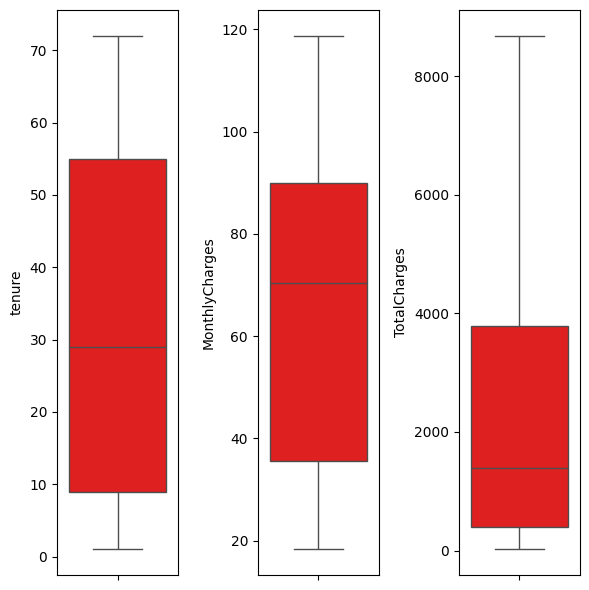

In [ ]:
plt.figure(figsize=(6, 6))

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='red')
    plt.tight_layout()

#### Observasi Boxplot:
1. Pada boxplot tenure:
- Menunjukkan distribusi skew positif (right-skewed) yang minor.
- Tidak terdapat outlier pada tenure.
2. Pada boxplot MonthlyCharges:
- Menunjukkan distribusi skew negatif (left-skewed) yang minor.
- Tidak terdapat outlier pada MonthlyCharges.
3. Pada boxplot TotalCharges:
- Menunjukkan distribusi skew positif (right-skewed) yang signifikan.
- Tidak terdapat outlier pada TotalCharges.

### KDE Plot for Knowing the Distribution Form (Numerical)

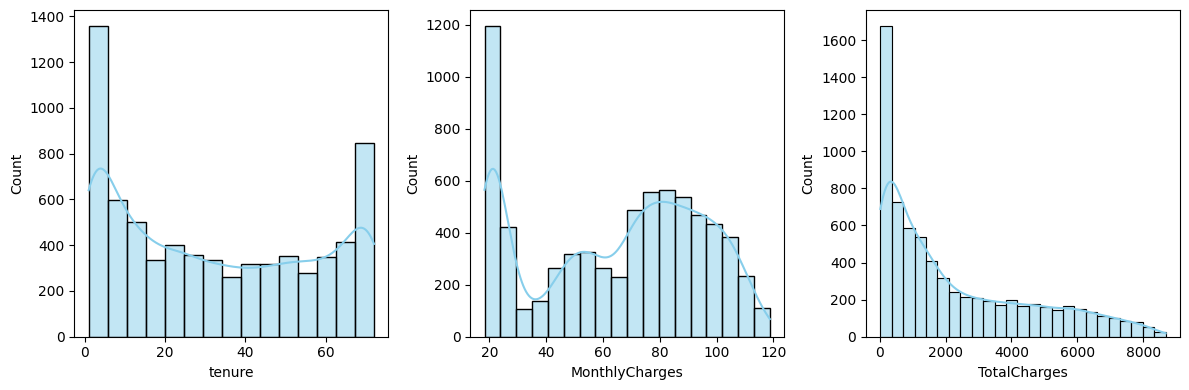

In [ ]:
plt.figure(figsize=(12, 4))

for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.histplot(x=df[numericals[i]], color='skyblue', kde=True)
    plt.xlabel(numericals[i])
    plt.tight_layout()

#### Observasi KDE Plot:
1. Pada histogram Tenure, terlihat bahwa distribusinya berbentuk U terbalik seperti bimodal distribution (terdapat 2 puncak). Puncak berada pada awal masa berlangganan dan akhir masa berlangganan yang mengindikasikan bahwa ada banyak pelanggan baru dan pelanggan setia yang sudah lama berlangganan.
2. Pada histogram MonthlyCharges, bentuk distribusinya bukanlah distribusi normal karena terdapat frekuensi yang besar di sisi paling kiri dari sumbu-x. Sehingga, distribusinya lebih ke arah bimodal distribution.
3. Pada histogram TotalCharges, terlihat bahwa distribusinya skew positif (right-skewed) secara signifikan. Artinya, sebagian besar pelanggan memiliki total tagihan yang rendah dan jumlahnya semakin sedikit untuk total tagihan yang tinggi.

### Countplot (Categorical)

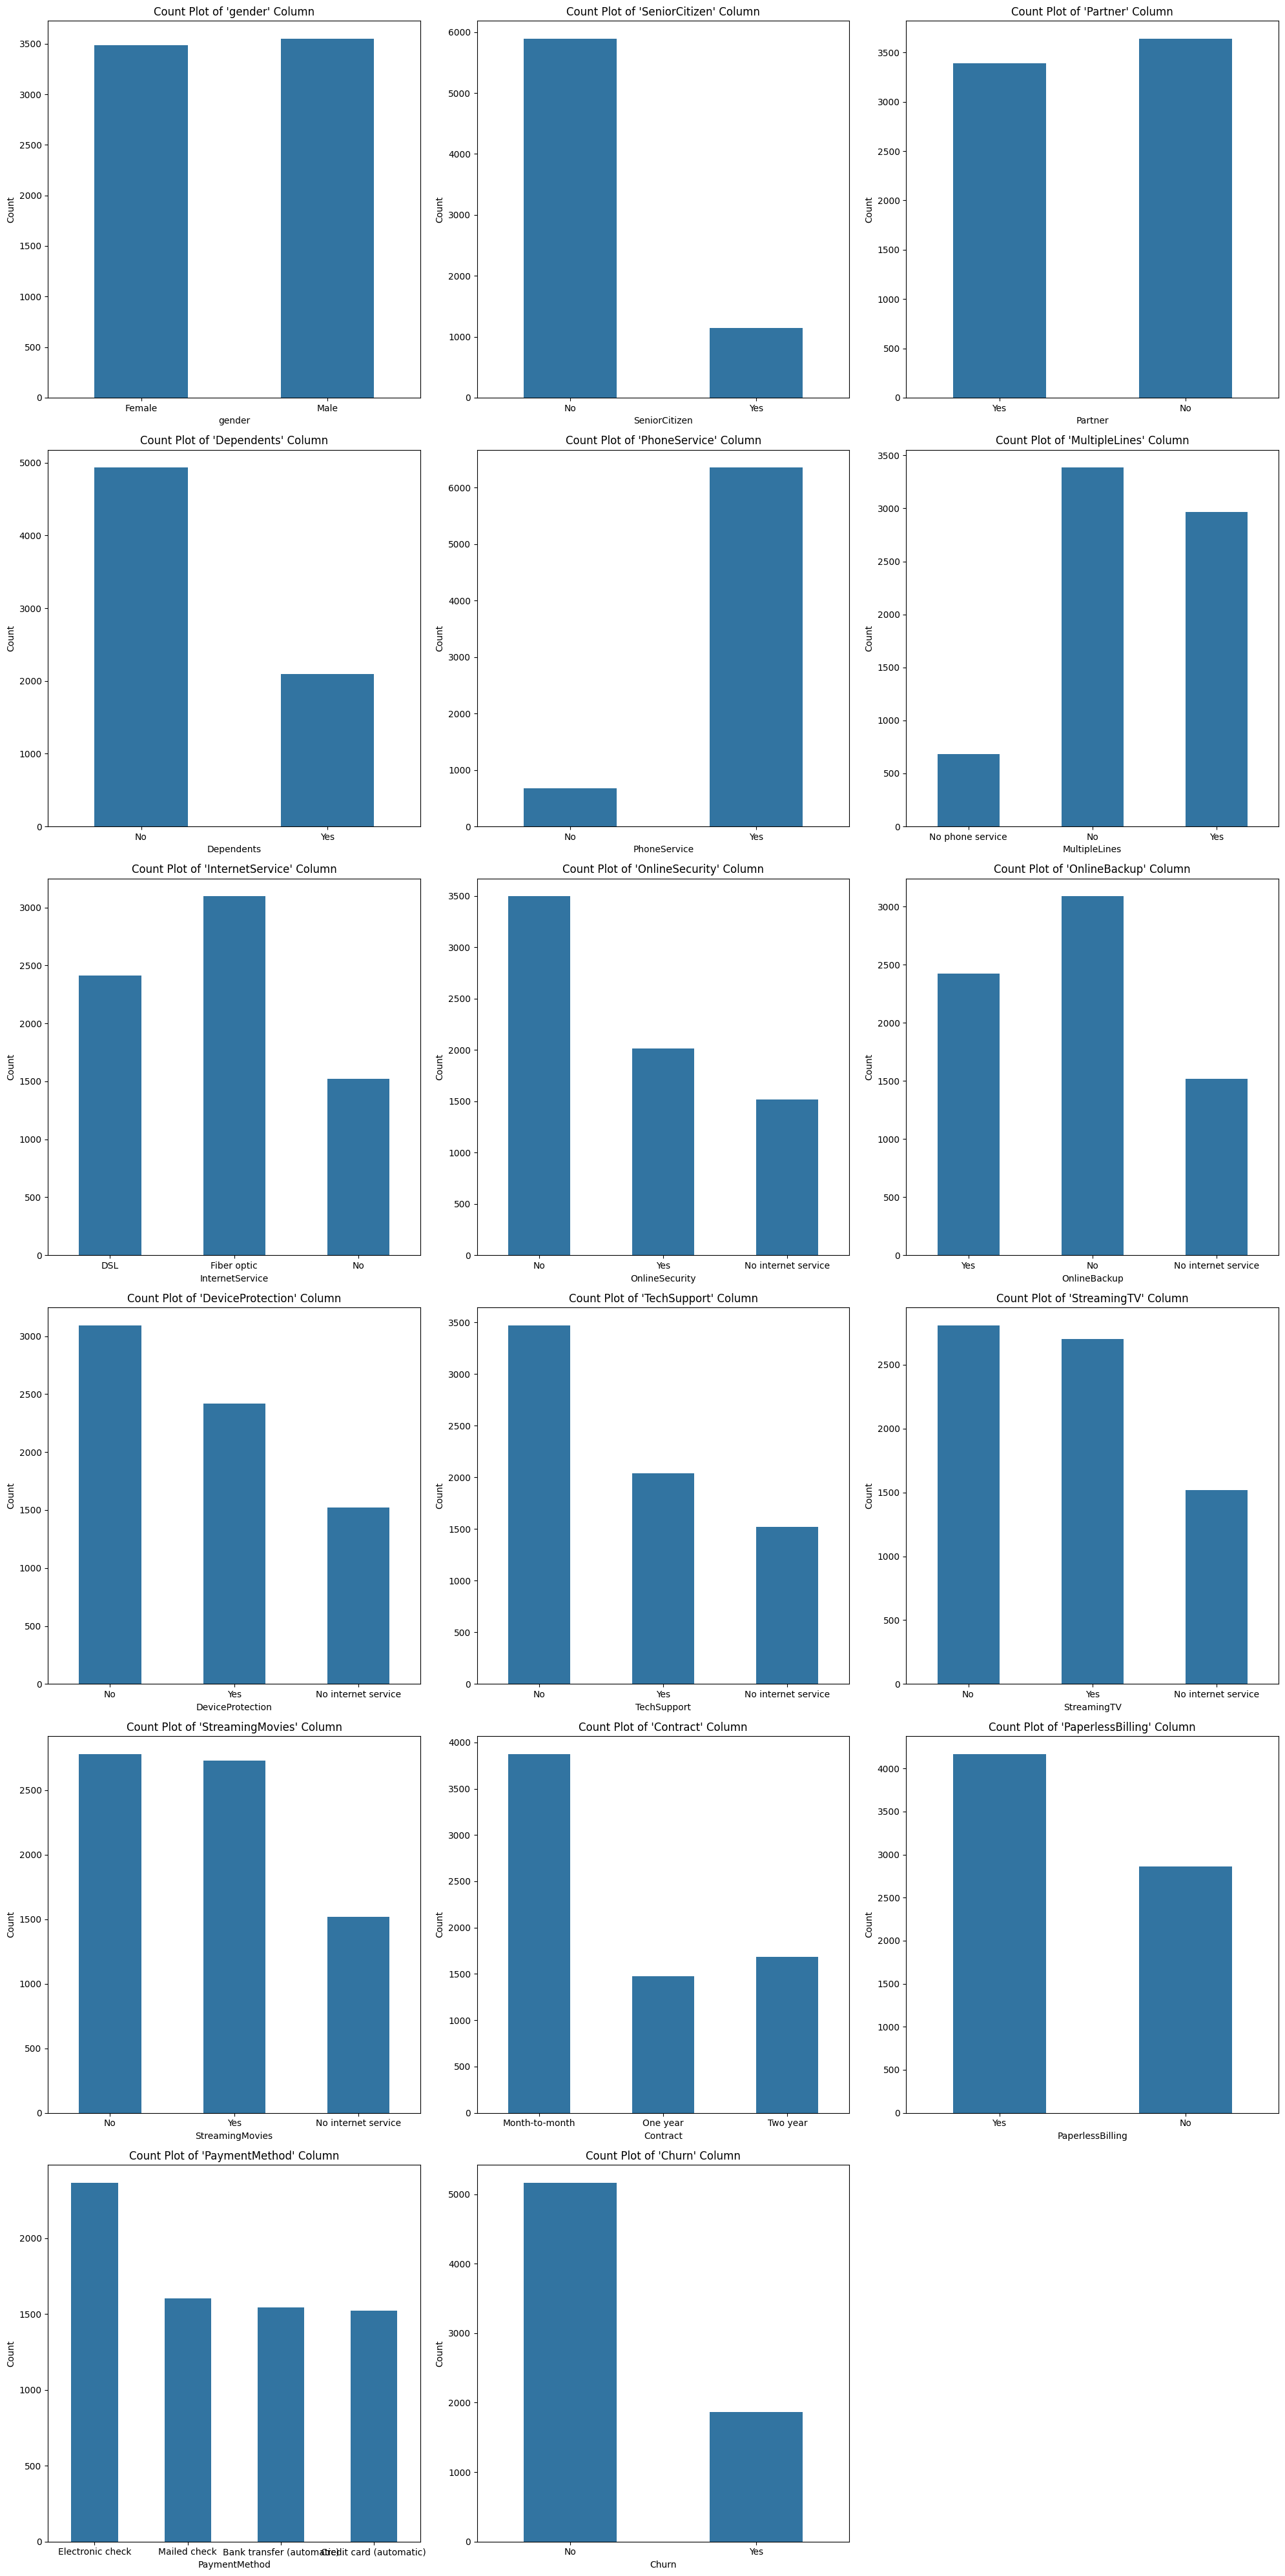

In [ ]:
# Adjust figure size
plt.figure(figsize=(20, 40))

# Plotting
features = categoricals
columns_plot = 3
rows_plot = (len(features) + columns_plot - 1) // columns_plot
for i in range(0, len(features)):
  plt.subplot(rows_plot, columns_plot, i + 1)
  sns.countplot(x=df[features[i]], width=0.5)
  plt.title(f"Count Plot of '{features[i]}' Column")
  plt.ylabel('Count')
  plt.tight_layout()

#### Observasi Countplot: <br>
Sebenarnya tidak ada banyak kesimpulan yang bisa diambil dari visualisasi ini. Isinya kurang lebih sama seperti categorical statistical summary di atas. Namun dengan menggunakan visualisasi countplot, tingkat perbedaan antar kategorinya terlihat jelas jika dibandingkan dengan teks pada statistical summary.

Berikut beberapa contoh observasi dari countplot:
- Countplot Gender: Jumlah pelanggan Male dan Female kurang lebih sama
- Countplot SeniorCitizen: Lebih banyak pelanggan berusia muda dibandingkan dengan berusia senior


## Multivariate Analysis

### Heatmap (Numerical)

<Axes: >

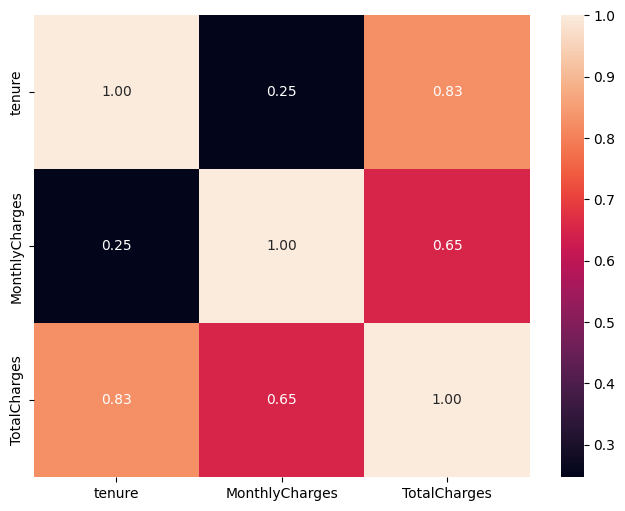

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))

correlation = df[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

#### Observasi Heatmap:
1. Korelasi antara Tenure dan TotalCharges:
Nilai korelasi sebesar 0.83 menunjukkan adanya korelasi positif yang kuat antara tenure (masa berlangganan) dengan TotalCharges. Hal ini masuk akal karena semakin lama seorang pelanggan berlangganan, maka semakin tinggi juga total tagihannya.
2. Korelasi antara MonthlyCharges dan TotalCharges:
Nilai korelasi sebesar 0.65 menunjukkan adanya korelasi positif yang cukup kuat antara MonthlyCharges dengan TotalCharges. Artinya, pelanggan yang membayar tagihan bulanan lebih tinggi cenderung memiliki total tagihan yang lebih besar.
3. Korelasi antara Tenure dan MonthlyCharges:
Nilai korelasi sebesar 0.25 menunjukkan adanya korelasi positif yang lemah antara Tenure dengan MonthlyCharges. Artinya, ada sedikit kecenderungan pelanggan dengan tenure yang panjang membayar tagihan bulanan yang lebih tinggi, namun hubungan ini tidak cukup kuat.

### Countplot (Categorical)

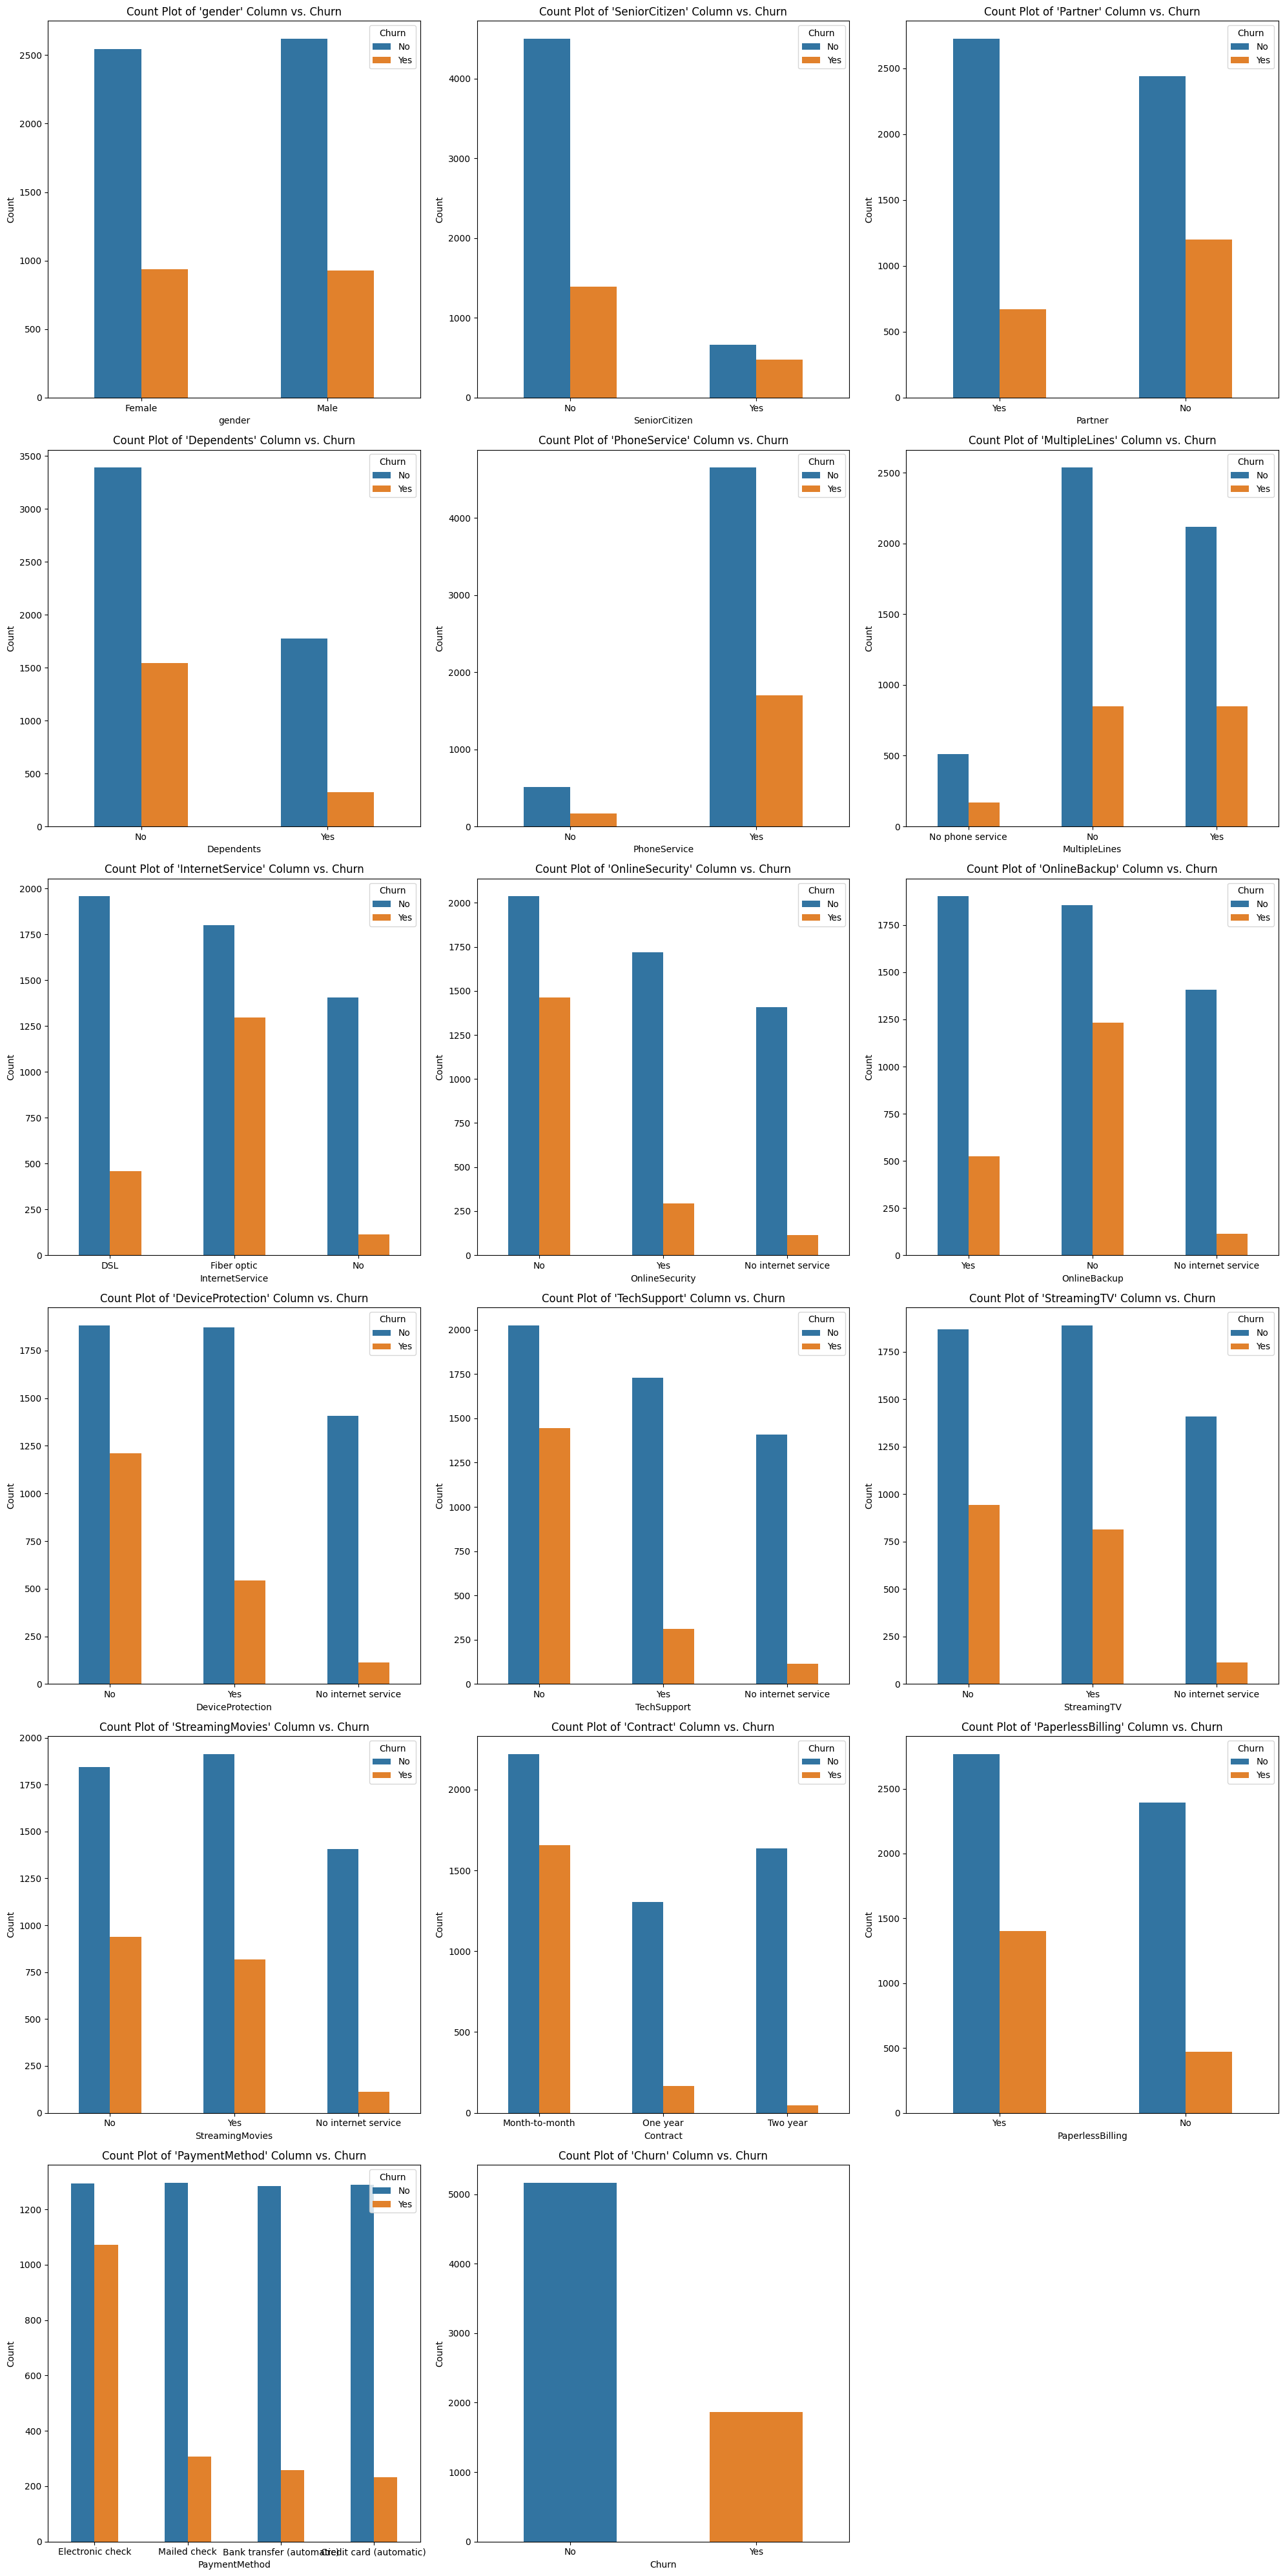

In [ ]:
# Adjust figure size
plt.figure(figsize=(20, 40))

# Plotting
features = categoricals
columns_plot = 3
rows_plot = (len(features) + columns_plot - 1) // columns_plot
for i in range(0, len(features)):
  plt.subplot(rows_plot, columns_plot, i + 1)
  sns.countplot(x=df[features[i]], hue=df['Churn'], width=0.5)
  plt.title(f"Count Plot of '{features[i]}' Column vs. Churn")
  plt.ylabel('Count')
  plt.tight_layout()

#### Observasi Countplot terhadap Tingkat Churn:
- Gender: Tingkat churn Pria dan Wanita hampir sama.
- SeniorCitizen: Tingkat churn pelanggan muda lebih tinggi daripada pelanggan senior.
- Partners: Tingkat churn pelanggan yang tidak memiliki pasangan lebih tinggi daripada pelanggan yang memiliki pasangan.
- Dependents: Tingkat churn pelanggan yang tidak memiliki tanggungan lebih tinggi daripada pelanggan yang memiliki tanggungan.
- PhoneService: Tingkat churn pelanggan yang memiliki layanan telepon lebih tinggi daripada pelanggan yang tidak memiliki layanan telepon.
- MultipleLines: Tingkat churn pelanggan yang memiliki beberapa saluran telepon hampir sama dengan pelanggan yang tidak memiliki beberapa saluran telepon. Namun, tingkat churn pelanggan yang tidak memiliki layanan telepon lebih rendah.
- InternetService: Pelanggan yang menggunakan layanan internet fiber optic cenderung lebih tinggi untuk churn.
- OnlineSecurity: Pelanggan yang tidak memiliki keamanan online cenderung lebih tinggi untuk churn.
- OnlineBackup: Pelanggan yang tidak memiliki cadangan online cenderung lebih tinggi untuk churn.
- DeviceProtection: Pelanggan yang tidak memiliki perlindungan perangkat cenderung lebih tinggi untuk churn.
- TechSupport: Pelanggan yang tidak memiliki dukungan teknis cenderung lebih tinggi untuk churn.
- StreamingTV: Tingkat churn pelanggan yang memiliki TV streaming hampir sama dengan pelanggan yang tidak memiliki TV streaming.
- StreamingMovies: Tingkat churn pelanggan yang memiliki layanan streaming film hampir sama dengan pelanggan yang tidak memiliki layanan streaming film.
- Contract: Pelanggan yang memiliki jangka waktu kontrak bulanan cenderung lebih tinggi untuk churn.
- PaperlessBilling: Pelanggan yang memiliki tagihan tanpa kertas cenderung lebih tinggi untuk churn.
- PaymentMethod: Pelanggan yang menggunakan metode pembayaran electronic check cenderung lebih tinggi untuk churn.
- Churn: Proporsi pelanggan yang churn kurang lebih setengah dari pelanggan yang tidak churn.

### Pairplot

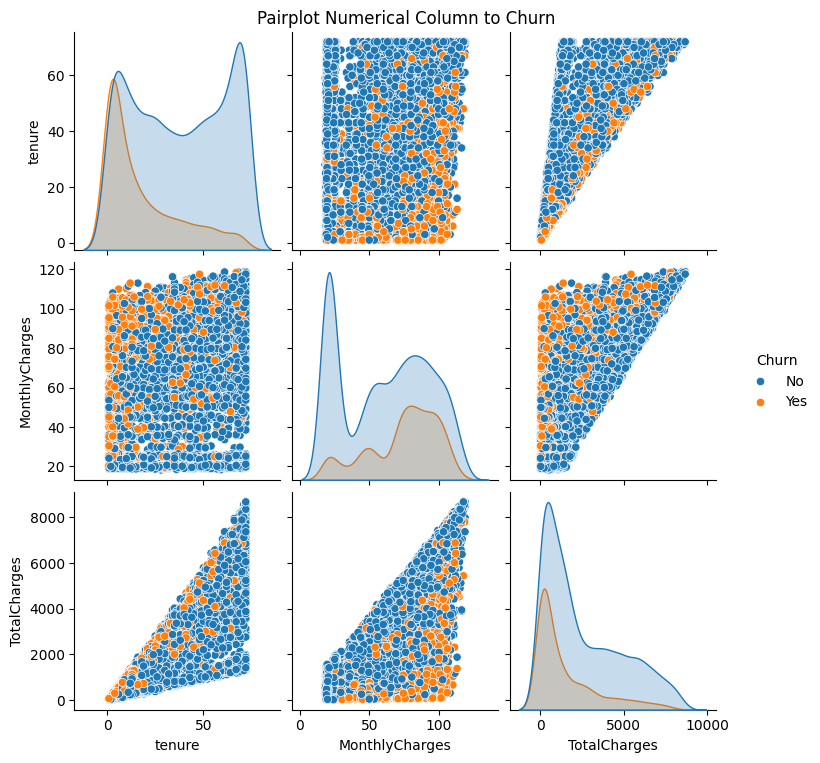

In [ ]:
# Pairplot of the data
sns.pairplot(df, hue='Churn')
plt.suptitle('Pairplot Numerical Column to Churn', y=1.01)
plt.show()

### Observasi Pairplot:
1. Plot dengan x = 'Tenure' dan y = 'Tenure': <br>
Pelanggan yang churn (berwarna orange) cenderung memiliki tenure yang lebih pendek, sementara pelanggan yang tidak churn (berwarna biru) cenderung memiliki tenure yang lebih lama
2. Plot dengan x = 'Tenure' dan y = 'MonthlyCharges': <br>
Pelanggan yang memiliki tenure yang pendek dan monthly charges yang tinggi cenderung melakukan churn.
3. Plot dengan x = 'Tenure' dan y = 'TotalCharges': <br>
Hubungan antara tenure dan TotalCharges tampak linear. Hal ini masuk akal karena semakin lama pelanggan berlangganan, maka semakin tinggi juga total tagihannya.

# 4. Deep Dive Exploratory Data Analysis
Pertanyaan Eksploratif (EDA)
1. Apakah ada hubungan antara metode pembayaran dan biaya bulanan rata-rata dalam menjelaskan tingkat churn?
2. Apakah pelanggan dengan kontrak jangka panjang (one year or two year) memiliki tingkat churn yang lebih rendah dibandingkan dengan pelanggan dengan kontrak bulanan (month-to-month)?

## Pertanyaan 1

In [ ]:
# Groupby - Aggregation
grouping_1 = df.groupby(['Churn', 'PaymentMethod']).agg(average_monthly_charges=('MonthlyCharges', 'mean')).reset_index()
grouping_1

,Churn,PaymentMethod,average_monthly_charges
0,No,Bank transfer (automatic),65.061604
1,No,Credit card (automatic),64.568813
2,No,Electronic check,74.232032
3,No,Mailed check,41.439506
4,Yes,Bank transfer (automatic),77.875581
5,Yes,Credit card (automatic),77.356034
6,Yes,Electronic check,78.700980
7,Yes,Mailed check,54.557143


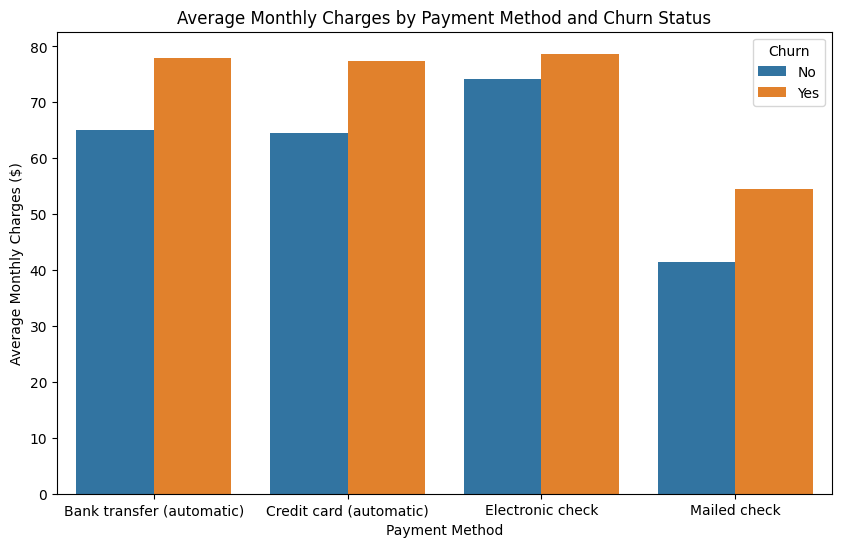

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='average_monthly_charges', hue='Churn', data=grouping_1)
plt.title('Average Monthly Charges by Payment Method and Churn Status')
plt.xlabel('Payment Method')
plt.ylabel('Average Monthly Charges ($)')
plt.show()

### Observasi
#### Pertanyaan:
Apakah ada hubungan antara metode pembayaran dan biaya bulanan rata-rata dalam menjelaskan tingkat churn?
#### Jawaban:
- Pelanggan dengan metode pembayaran Electronic check memiliki rata-rata biaya bulanan yang paling tinggi di antara metode pembayaran lainnya, baik untuk pelanggan yang churn maupun yang tidak churn.
- Rata-rata biaya bulanan pelanggan yang churn lebih tinggi dibandingkan yang tidak churn. Ini menunjukkan bahwa pelanggan yang memiliki biaya bulanan tinggi cenderung lebih mungkin untuk churn. Hal ini bisa jadi disebabkan oleh harga produk atau servis yang terlalu mahal.
- Metode pembayaran otomatis seperti Bank transfer dan Credit card memiliki tingkat churn yang lebih rendah. Hal ini kemungkinan disebabkan oleh kenyamanan dan keteraturan pembayaran.
- Salah satu strategi yang dapat dilakukan untuk menurunkan tingkat churn adalah mempromosikan metode pembayaran otomatis kepada pelanggan. Memberikan beberapa keuntungan seperti diskon bila membayar secara otomatis agar pelanggan mau beralih ke pembayaran otomatis.

## Pertanyaan 2

In [ ]:
# Groupby - Aggregation
grouping_2 = df.groupby(['Churn', 'Contract']).agg(average_monthly_charges=('MonthlyCharges', 'mean')).reset_index()
grouping_2

,Churn,Contract,average_monthly_charges
0,No,Month-to-month,61.462635
1,No,One year,62.540926
2,No,Two year,60.112798
3,Yes,Month-to-month,73.019396
4,Yes,One year,85.050904
5,Yes,Two year,86.777083


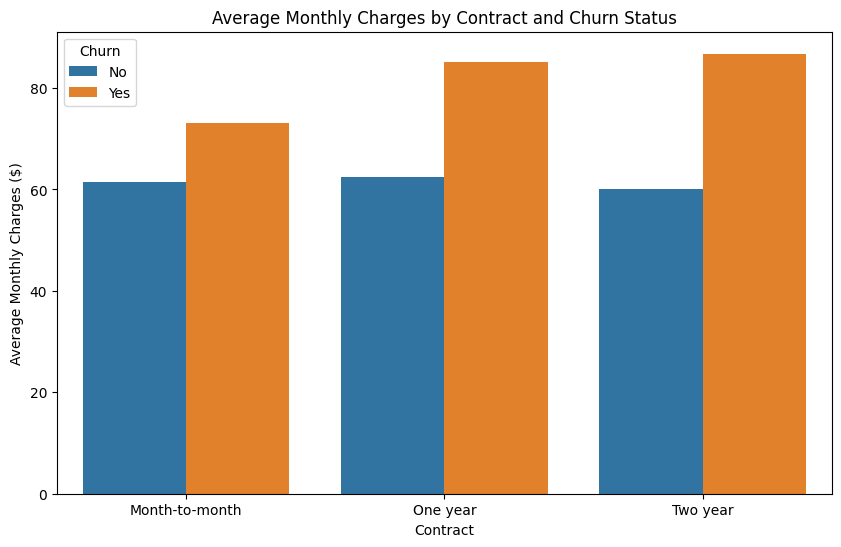

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='average_monthly_charges', hue='Churn', data=grouping_2)
plt.title('Average Monthly Charges by Contract and Churn Status')
plt.xlabel('Contract')
plt.ylabel('Average Monthly Charges ($)')
plt.show()

### Observasi
#### Pertanyaan:
Apakah pelanggan dengan kontrak jangka panjang (one year or two year) memiliki tingkat churn yang lebih rendah dibandingkan dengan pelanggan dengan kontrak bulanan (month-to-month)?
#### Jawaban:
- Pelanggan yang churn memiliki rata-rata biaya bulanan yang lebih tinggi daripada pelanggan yang tidak churn. Hal ini menunjukkan bahwa biaya bulanan yang tinggi merupakan salah satu penyebab pelanggan memilih untuk churn (berhenti berlangganan)
- Pelanggan dengan kontrak jangka panjang (one year or two year) menunjukkan bahwa meskipun rata-rata biaya bulanan lebih tinggi untuk pelanggan yang churn, kontrak jangka panjang menurunkan tingkat churn secara keseluruhan.
- Salah satu strategi yang dapat dilakukan untuk menurunkan tingkat churn adalah dengan memberikan diskon biaya bulanan pada pelanggan dengan kontrak bulanan (month-to-month) untuk sementara waktu hingga mereka cocok/terikat dengan produknya. Apabila mereka sudah cocok, maka mereka pasti akan setia dan beralih ke kontrak jangka panjang (one year or two year).